#Business Objective:
Data provided is related to gold prices. The objective is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.
This forecast model will be used by gold exporting and gold importing companies to understand the metal price movements and accordingly set their revenue expectations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gold = pd.read_csv("/content/Gold_data.csv")
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [ ]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [ ]:
gold.isnull().sum()

date     0
price    0
dtype: int64

In [ ]:
gold.duplicated().sum()

0

In [ ]:
gold.corr()

,price
price,1.0


In [ ]:
gold.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


#EDA

#EDA

In [ ]:
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


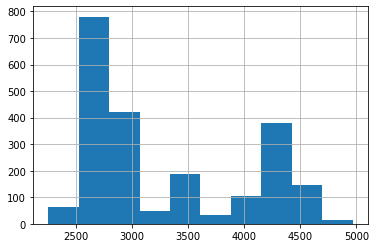

In [ ]:
plt.hist(gold["price"])
plt.grid("drak")
plt.show()

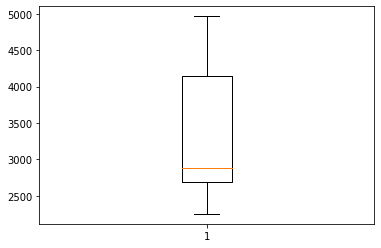

In [ ]:
plt.boxplot(gold["price"])
plt.show()

* There is no outliers present in our data

In [ ]:
gold["price"].agg(["var","median","skew","kurtosis"])

var         517772.975169
median        2879.800000
skew             0.637312
kurtosis        -1.243159
Name: price, dtype: float64

> Converting date column in datetime formate

In [ ]:
#_converting date column into datetime formate_
gold["date"] = pd.to_datetime(gold["date"],format='%Y-%m')
gold = gold.set_index('date')
gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


# Time Serise Analysis

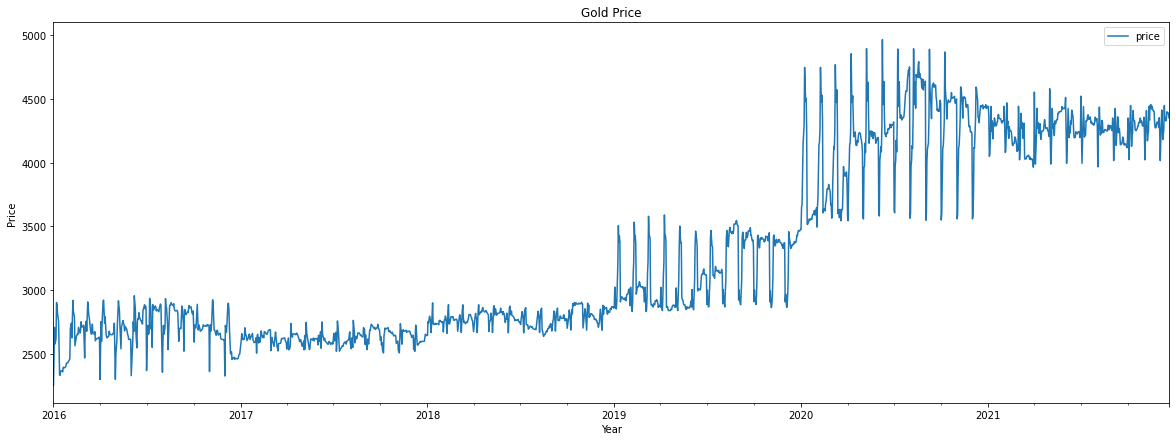

In [ ]:
gold.plot(figsize=(20,7))
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Gold Price')
plt.show(block=False)

* There is no missing values in data

# Upsamleing data for average price



In [ ]:
upsample = gold.resample('A').mean()# data transfard into yearly
upsample.head()

,price
date,
2016-12-31,2690.614162
2017-12-31,2626.676484
2018-12-31,2781.938082
2019-12-31,3150.210685
2020-12-31,4216.378689


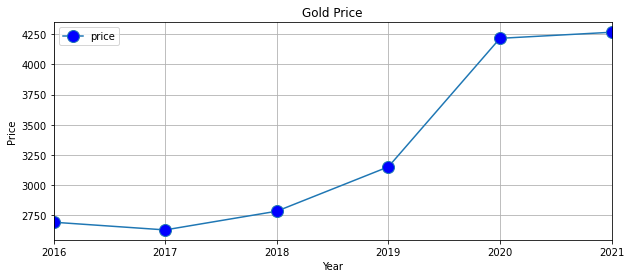

In [ ]:
upsample.plot(figsize=(10,4), marker='o', markerfacecolor='blue', markersize=12)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Gold Price')
plt.grid()
plt.show(block=False)

*_Observation_*:- In above graph we can see price of gold increses very high in year between 2019-2020

In [ ]:
quarter_sample = gold.resample('Q').mean()# data is transform to quaterly
quarter_sample.head(20)

,price
date,
2016-03-31,2621.007692
2016-06-30,2700.096154
2016-09-30,2788.126630
2016-12-31,2652.572645
2017-03-31,2622.654630
2017-06-30,2611.393407
2017-09-30,2636.719022
2017-12-31,2635.685326
2018-03-31,2760.522222


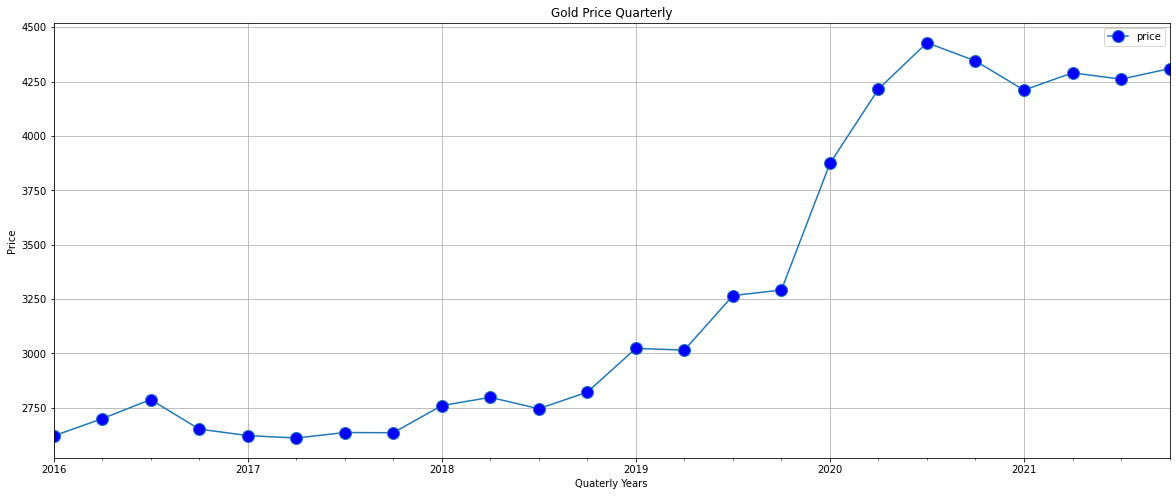

In [ ]:
quarter_sample.plot(figsize=(20,8), marker='o', markerfacecolor='blue', markersize=12)
plt.title('Gold Price Quarterly')
plt.xlabel('Quaterly Years')
plt.ylabel('Price')
plt.grid()
plt.show(block=False)

In [ ]:
monthly_sample = gold.resample('M').mean() # data is transfered to monthly average price
monthly_sample.head(10)

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000
2016-06-30,2745.596667
2016-07-31,2779.582258
2016-08-31,2792.240323
2016-09-30,2792.705000


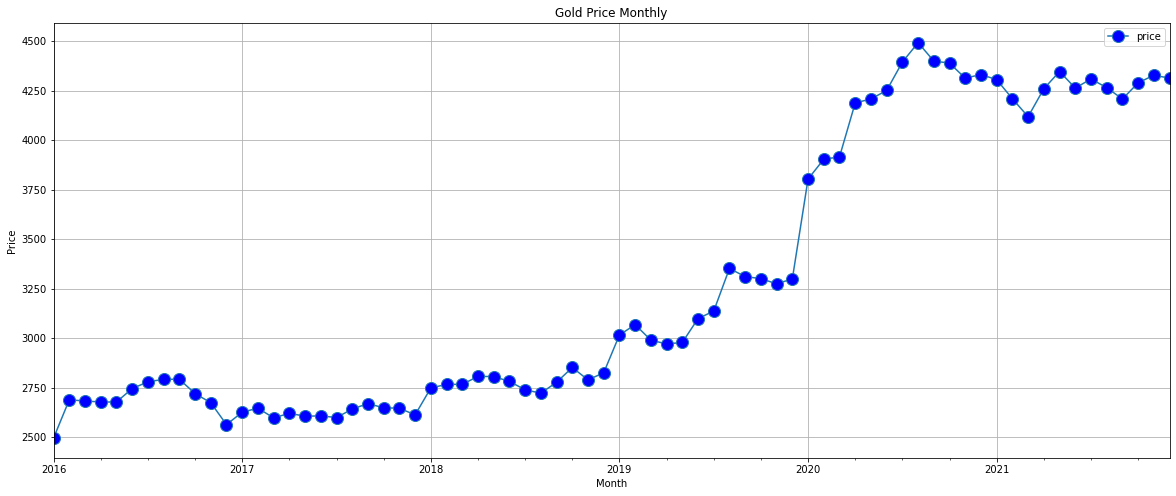

In [ ]:
monthly_sample.plot(figsize=(20,8), marker='o', markerfacecolor='blue', markersize=12)
plt.title('Gold Price Monthly')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show(block=False)

In [ ]:
import seaborn as sns

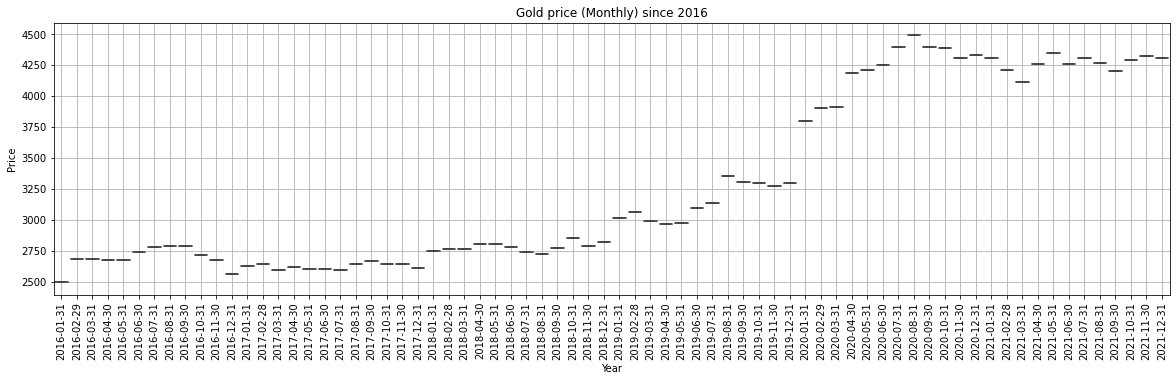

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = monthly_sample.index.date, 
                y = monthly_sample['price'], 
                ax = ax)
plt.title("Gold price (Monthly) since 2016")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

_Observation_:- 
* their is many ups and down in price of gold as per monthly bases
* but their is no outliers 

#**Time Serise Decomposition**

<Figure size 864x864 with 0 Axes>

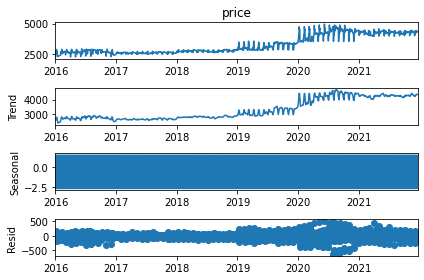

In [ ]:
plt.figure(figsize=(12,12))
import pylab
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(gold.price, model='additive') #additive seasonal index
fig = decomposition.plot()
plt.show()

<Figure size 864x864 with 0 Axes>

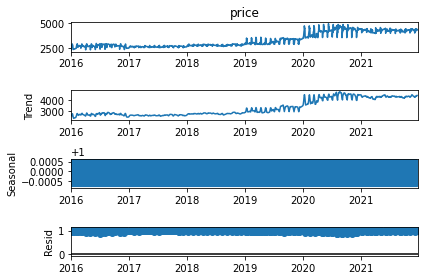

In [ ]:
decomposition = sm.tsa.seasonal_decompose(gold.price, model='multiplicative') #multiplicative seasonal index
plt.figure(figsize=(12,12))
decomposition.plot()
plt.show()

#**Building Model with Basic forcasting methods**

In [ ]:
# spliting train test 
train_len = 1900
train = gold[:train_len]
test = gold[train_len:]

**Naive Method**

Forcast = Last day price

In [ ]:
y_hat_naive = test.copy()
y_hat_naive['naive forcast'] = train['price'][train_len-1]

In [ ]:
y_hat_naive['naive forcast'].head()

date
2021-03-15    4030.0
2021-03-16    4030.0
2021-03-17    4030.0
2021-03-18    4030.0
2021-03-19    4030.0
Name: naive forcast, dtype: float64

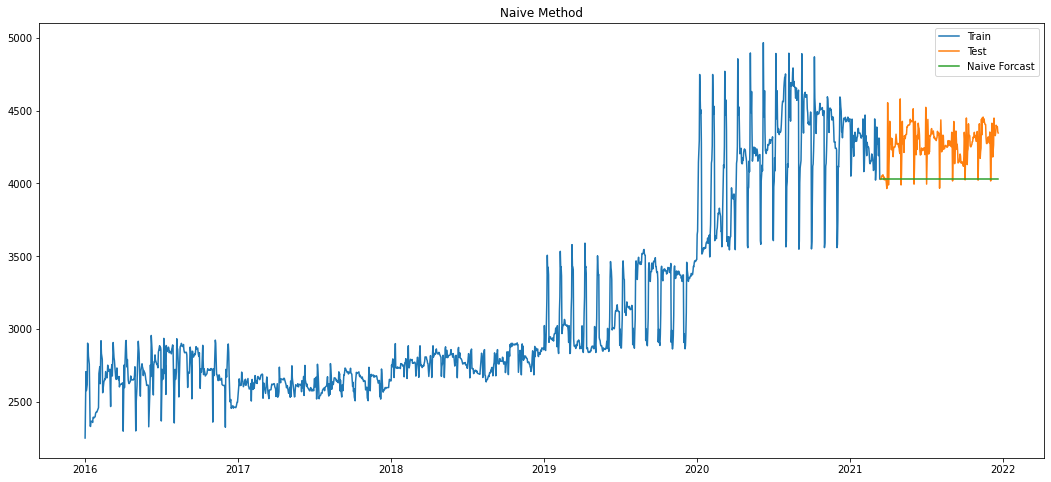

In [ ]:
# Ploting train test forcast
plt.figure(figsize=(18,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_naive['naive forcast'],label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

**Root Mean Squared Error (RMSE):** Since the error term you get from MSE is not in the same dimension as the target variable 'y' (it is squared), you deploy a metric known as RMSE wherein you take the square root of the MSE value obtained.

**Mean Absolute Percentage Error (MAPE):** The problem with MAE is that even if you get an error value, you have nothing to compare it against. For example, if the MAE that you get is 1.5, you cannot tell just on the basis of this number whether you have made a good forecast or not. If the actual values are in single digits, this error of 1.5 is obviously high but if the actual values are, say in the order of thousands, an error of 1.5 indicates a good forecast. So in order to capture how the forecast is doing based upon the actual values, you evaluate mean absolute error where you take the mean absolute error
(MAE) as the percentage of the actual values of 'y'.

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['price'],y_hat_naive['naive forcast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_naive['naive forcast'])/test['price'])*100,2) 

In [ ]:
result = pd.DataFrame({'Method':['Naive Method'],'RMSE':[rmse],'MAPE':[mape] })
results = result[['Method','RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.5,5.63


**Observation**:- on Naive method model our forcasting is good but we will build more models by different methods to compair which is giving the best and accuret values 

======================================================================================================================================================================================================================================

# Simple Average Method

**Forcasting = Average of all past day's price**



In [ ]:
y_hat_avg = test.copy()

In [ ]:
y_hat_avg['avg_forecast'] = train['price'].mean()
y_hat_avg.head()

,price,avg_forecast
date,,
2021-03-15,4029.1,3138.094842
2021-03-16,4030.5,3138.094842
2021-03-17,4050.3,3138.094842
2021-03-18,4049.6,3138.094842
2021-03-19,4051.8,3138.094842


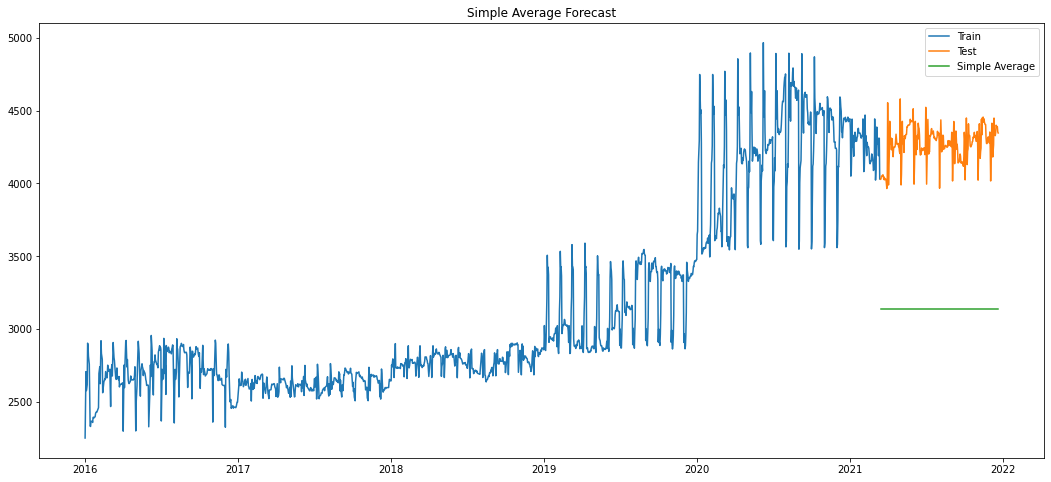

In [ ]:
# Ploting train test and forecast
plt.figure(figsize=(18,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Simple Average')
plt.legend(loc='best')
plt.title('Simple Average Forecast')
plt.show()



In [ ]:
# Calculating RMSE AND MAPE
rmse = np.sqrt(mean_squared_error(test['price'],y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_avg['avg_forecast'])/test['price'])*100,2) 


tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46


**Observation**:- As we can see our (mape) is very high and also we can see in our graph. So, let us build more models with differnt method to see better results  

======================================================================================================================================================================================================================================

## Simple moving average method

Considering that the last observation in the time series has more impact on the future rather than the first observation, in the simple moving average method, we take the average of only the last few observations to forecast the future.
In this method, the forecasts are calculated using the average of the time-series data in the moving window considered. 

The window of the past observations in the time series data keeps moving, and hence the average values keep changing. This helps in forecasting values at every step in the dataset. This is helpful, because in any time series data, the recent observations have more influence on the forecasts than the previous observations. Thus a smaller window size generally forecasts closer to the actual values as it is able to take the variations in the time series data of the recent values. The higher the window size, these variations get distributed and as a result, the forecasts may not be very close to the actual values.

In [ ]:
y_hat_sma = gold.copy()
ma_windowsize = 30 # keeping window size for 30-30 day's
y_hat_sma['sma_forecast'] = gold['price'].rolling(ma_windowsize).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [ ]:
y_hat_sma.tail()

,price,sma_forecast
date,,
2021-12-17,4394.4,4194.11
2021-12-18,4389.5,4194.11
2021-12-19,4389.5,4194.11
2021-12-20,4354.1,4194.11
2021-12-21,4346.5,4194.11


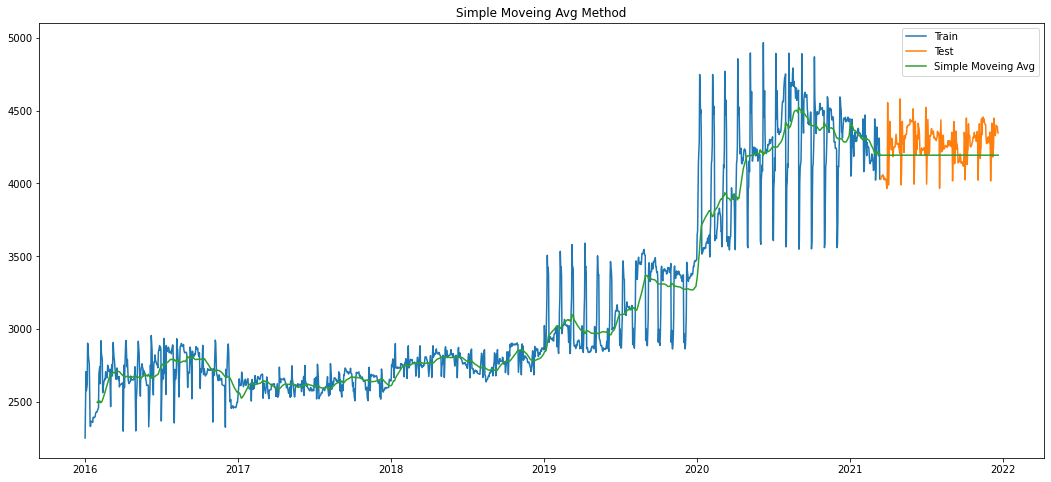

In [ ]:
# Ploting train, test and forecasting
plt.figure(figsize=(18,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moveing Avg')
plt.title('Simple Moveing Avg Method')
plt.legend(loc='best')
plt.show()

In [ ]:
# Now calculating RMSE and MAPE
rmse =  np.sqrt(mean_squared_error(test['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_sma['sma_forecast'][train_len:])/test['price'])*100,2)

Smaresults = pd.DataFrame({'Method':['Simple Moveing Avg Method'],'RMSE':[rmse],'MAPE':[mape] })
results = pd.concat([results, Smaresults])
results_2 = results[['Method', 'RMSE', 'MAPE']]
results_2 

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72


**Simple moveing average method** is also give minimum (mape) == 1.74 on test data as we see in graph

======================================================================================================================================================================================================================================

#Holt's Methods with Trends

Holt's exponential smoothing technique forecasts the level and trend of the time series data. Now the forecast equation is a function of both level and trend

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['price']),seasonal_periods = 30, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.1, optimized=False)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-38-2b5684e81f71>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.1, optimized=False)


In [ ]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 2252.6,
 'initial_trend': 201.9000000000001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_holt = test.copy()
y_hat_holt['exp_price'] = model_fit.forecast(len(test))

In [ ]:
pd.DataFrame(y_hat_holt['exp_price'].head())

,exp_price
date,
2021-03-15,4183.154573
2021-03-16,4180.474251
2021-03-17,4177.793929
2021-03-18,4175.113607
2021-03-19,4172.433285


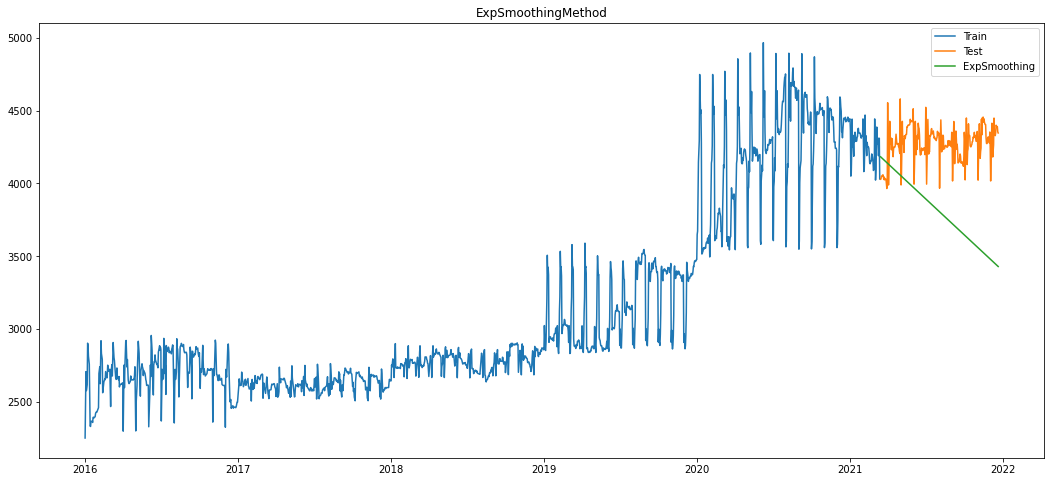

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(y_hat_holt['exp_price'],label='ExpSmoothing')
plt.title('ExpSmoothingMethod')
plt.legend(loc='best')
plt.show()

In [ ]:
rems = np.sqrt(mean_squared_error(test['price'], y_hat_holt['exp_price'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_holt['exp_price'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20


**Observation**:- As we can see our (mape) is high which means our exponential smoothing method is not working good with **trends**. Even we can see there is downfall in price of gold.


======================================================================================================================================================================================================================================

## Holt Winters' additive method with trend and seasonality

The Holt-Winters’ smoothing technique forecasts the level, trend as well as the seasonality for a time series data.. The forecast equation now has seasonal components, including level and trend

In [ ]:
model = ExponentialSmoothing(np.asarray(train['price']),seasonal_periods=30, trend='add', seasonal='add')
model_fit1 = model.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
model_fit1.params

{'smoothing_level': 0.9596832142708132,
 'smoothing_trend': 9.990420122658425e-05,
 'smoothing_seasonal': 0.040276468943457655,
 'damping_trend': nan,
 'initial_level': 3167.0135833333334,
 'initial_trend': -12.581611111111116,
 'initial_seasons': array([-902.65958333, -710.53108333, -468.44508333, -589.44458333,
        -567.58208333, -548.05758333, -272.16208333, -286.58158333,
        -356.18408333, -384.01908333, -412.99058333, -616.59158333,
        -824.09658333, -831.47058333, -800.10158333, -800.12741667,
        -798.16925   , -796.74658333, -807.26508333, -775.04208333,
        -773.37258333, -778.32608333, -775.18275   , -771.35441667,
        -767.69908333, -746.48608333, -738.52358333, -736.37308333,
        -737.35958333, -728.46908333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_add = test.copy()
y_hat_add['additive_trend'] = model_fit1.forecast(len(test))

In [ ]:
pd.DataFrame(y_hat_add['additive_trend'].head())

,additive_trend
date,
2021-03-15,4033.735355
2021-03-16,3988.304022
2021-03-17,3894.766080
2021-03-18,3779.684060
2021-03-19,3669.786667


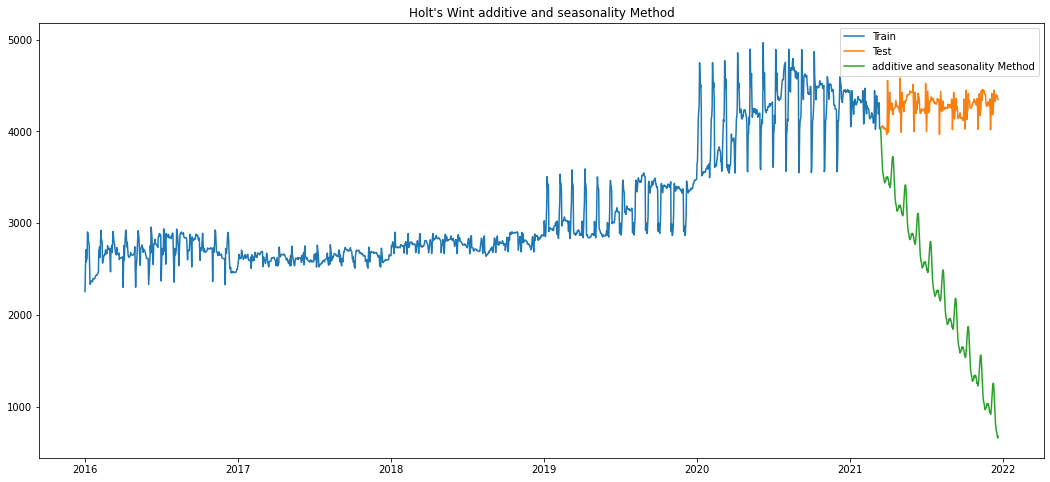

In [ ]:
# ploting train, test, forecast
plt.figure(figsize=(18,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(y_hat_add['additive_trend'],label='additive and seasonality Method')
plt.title('Holt\'s Wint additive and seasonality Method')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_add['additive_trend'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_add['additive_trend'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s Wint additive and seasonality Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84


**Observation**:- even after useing additive method, model is not giving the best results. Here RMSE and MAPE is much more higher then Holt's exponential smoothing method.


======================================================================================================================================================================================================================================

## Holt Winter's multiplicative method with trend and seasonality

Now Building model by adding Multiplicative method

In [ ]:
model2 = ExponentialSmoothing(np.asarray(train['price']),seasonal_periods=30, trend='add', seasonal='mul')
model_fit2 = model2.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
model_fit2.params

{'smoothing_level': 0.9596428475746105,
 'smoothing_trend': 9.999999800587341e-05,
 'smoothing_seasonal': 0.04035715242538951,
 'damping_trend': nan,
 'initial_level': 3167.5395750240777,
 'initial_trend': 6.102751623311447,
 'initial_seasons': array([0.88081652, 0.86844481, 0.87145296, 0.87059383, 0.87944019,
        0.87901136, 0.95540095, 0.94212228, 0.89976375, 0.89679454,
        0.88805722, 0.87527545, 0.86395466, 0.83532854, 0.82864606,
        0.81318336, 0.81023868, 0.80596554, 0.79353034, 0.78795287,
        0.7741077 , 0.7658785 , 0.76386787, 0.78120656, 0.79595942,
        0.8107258 , 0.81829676, 0.82515392, 0.84051686, 0.85590786]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_mul = test.copy()
y_hat_mul['multi_trend'] = model_fit2.forecast(len(test))

In [ ]:
pd.DataFrame(y_hat_mul['multi_trend'].head())

,multi_trend
date,
2021-03-15,4016.280783
2021-03-16,3966.672039
2021-03-17,3907.514493
2021-03-18,3851.578252
2021-03-19,3794.720094


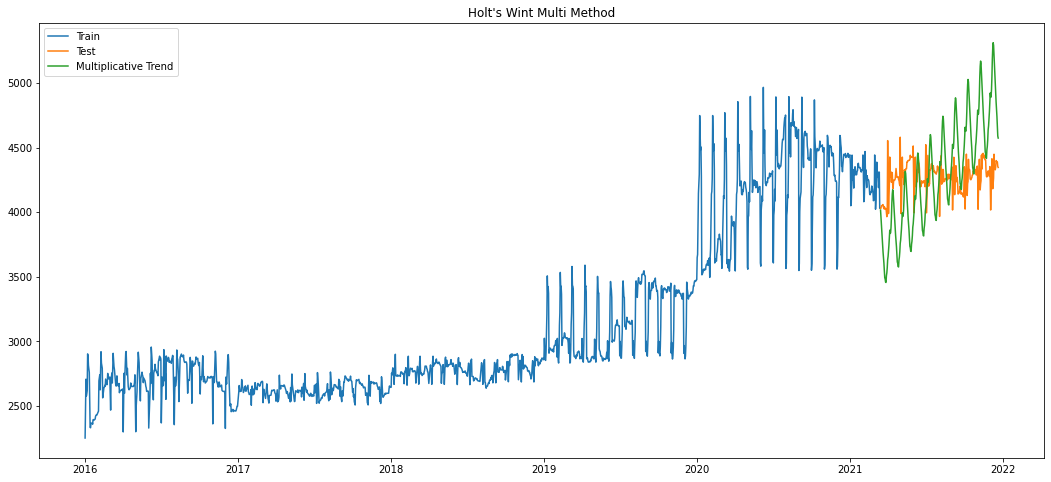

In [ ]:
# ploting train, test, forecasting
plt.figure(figsize=(18,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(y_hat_mul['multi_trend'],label='Multiplicative Trend')
plt.title('Holt\'s Wint Multi Method')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_mul['multi_trend'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_mul['multi_trend'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s Wint Multi Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84
0,Holt's Wint Multi Method,411.13,7.86


**Observation**:- Our multiplicative trend method is also not giving the good results as we can see percentage of error is high, and in graph price is getting higher day by day

In [ ]:
# Cheacking stationarity of data  Augmented Dicky Fuller Test
# H0: It is noon Stationary, if p-value is not <=0.05
# H1: It is Stationary, if p-value is < 0.05
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(gold['price'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.309904
Critical Values @ 0.05: -2.86
p-value: 0.924090


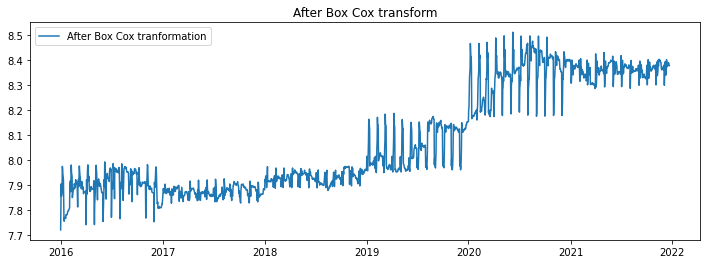

In [ ]:
#Box Cox transformation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(gold['price'], lmbda=0), index = gold.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [ ]:
data_boxcox

date
2016-01-01    7.719840
2016-01-02    7.805678
2016-01-03    7.904003
2016-01-04    7.854692
2016-01-05    7.862401
                ...   
2021-12-17    8.388086
2021-12-18    8.386971
2021-12-19    8.386971
2021-12-20    8.378873
2021-12-21    8.377126
Length: 2182, dtype: float64

# Makeing Data stationary by Differenc removing

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(1), gold.index)
data_boxcox_diff

date
2016-01-01         NaN
2016-01-02    0.085838
2016-01-03    0.098324
2016-01-04   -0.049311
2016-01-05    0.007709
                ...   
2021-12-17   -0.001228
2021-12-18   -0.001116
2021-12-19    0.000000
2021-12-20   -0.008097
2021-12-21   -0.001747
Length: 2182, dtype: float64

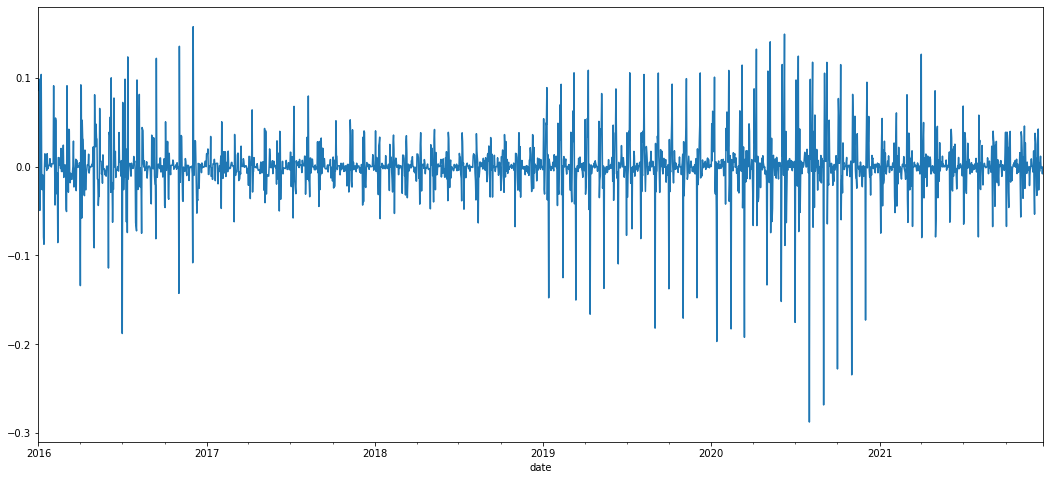

In [ ]:
data_boxcox_diff.plot(figsize=(18,8))
plt.show()

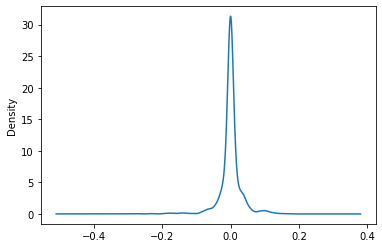

In [ ]:
data_boxcox_diff.plot(kind="kde")

In [ ]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff

date
2016-01-02    0.085838
2016-01-03    0.098324
2016-01-04   -0.049311
2016-01-05    0.007709
2016-01-06    0.007650
                ...   
2021-12-17   -0.001228
2021-12-18   -0.001116
2021-12-19    0.000000
2021-12-20   -0.008097
2021-12-21   -0.001747
Length: 2181, dtype: float64

In [ ]:
# Checking stationary of data after differenc removing
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -21.394232
Critical Values @ 0.05: -2.86
p-value: 0.000000


# Auto Correlation Function And Pacial Correlation Function

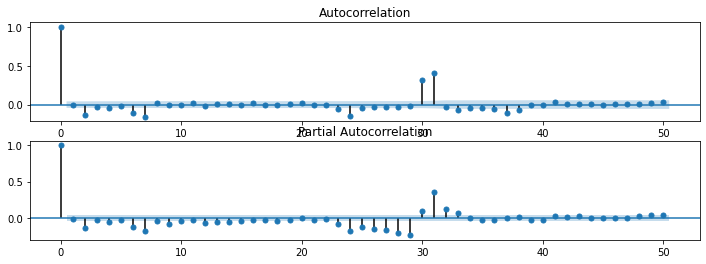

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plt.subplot(211)
plot_acf(data_boxcox_diff,ax=plt.gca(),lags=50)
plt.subplot(212)
plot_pacf(data_boxcox_diff,ax=plt.gca(),lags = 50)
plt.show()

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
valid_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
valid_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Building models after Difference removing 


1.   AR
2.   MA
3.   ARMA
4.   ARIMA
5.   SARIMA



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(2, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.000300
ar.L1.y   -0.006182
ar.L2.y   -0.116233
dtype: float64


In [ ]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

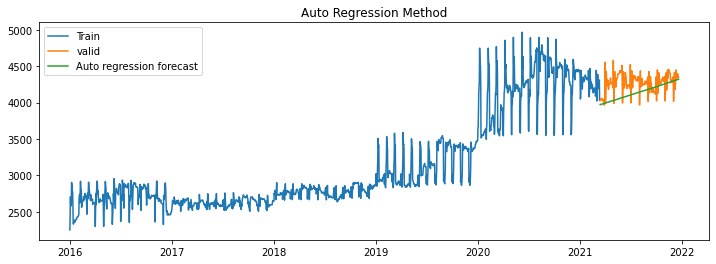

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='valid')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_ar['ar_forecast'][test.index.min():])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84
0,Holt's Wint Multi Method,411.13,7.86
0,Autoregressive (AR) method,183.32,3.43


In [ ]:
# MA model
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 2)) 
model_fit = model.fit()
print(model_fit.params)

const      0.000297
ma.L1.y   -0.014718
ma.L2.y   -0.140886
dtype: float64


In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

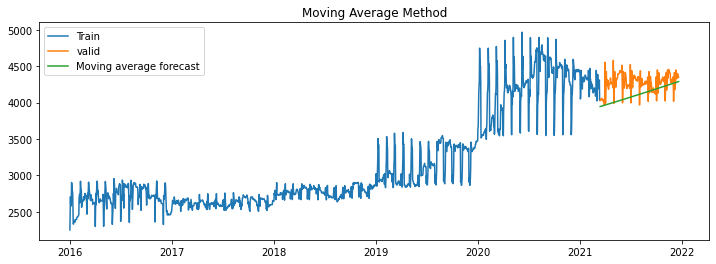

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(gold['price'][:train_len], label='Train')
plt.plot(gold['price'][train_len:], label='valid')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_ma['ma_forecast'][test.index.min():])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84
0,Holt's Wint Multi Method,411.13,7.86
0,Autoregressive (AR) method,183.32,3.43
0,Moving Average (MA) method,203.82,3.92


In [ ]:
#ARMA Model
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.000276
ar.L1.y    0.793763
ma.L1.y   -0.972186
dtype: float64


In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

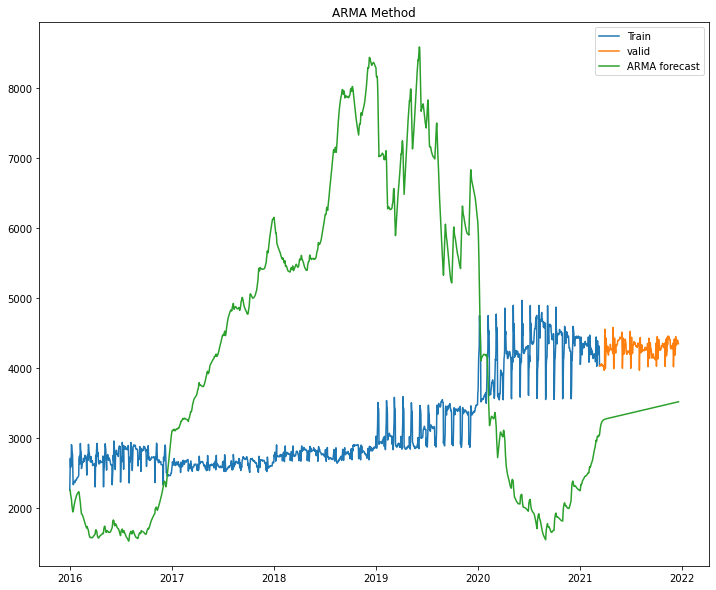

In [ ]:
plt.figure(figsize=(12,10))
plt.plot( gold['price'][:train_len-1], label='Train')
plt.plot(gold['price'][train_len-1:], label='valid')
plt.plot(y_hat_arma['arma_forecast'][gold.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_arma['arma_forecast'][train_len-1:])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84
0,Holt's Wint Multi Method,411.13,7.86
0,Autoregressive (AR) method,183.32,3.43
0,Moving Average (MA) method,203.82,3.92
0,Autoregressive moving average (ARMA) method,897.03,20.78


In [ ]:
# ARIMA
model = ARIMA(data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const      0.000301
ar.L1.y   -0.009388
dtype: float64


In [ ]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

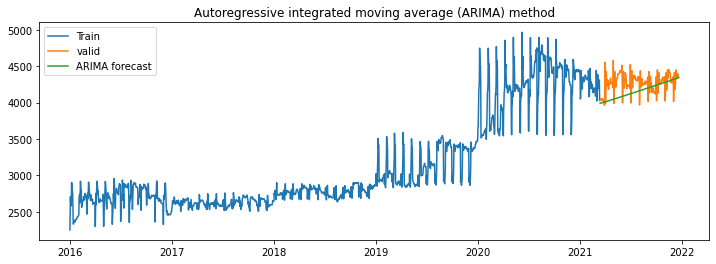

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='valid')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_arima['arima_forecast'][test.index.min():])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84
0,Holt's Wint Multi Method,411.13,7.86
0,Autoregressive (AR) method,183.32,3.43
0,Moving Average (MA) method,203.82,3.92
0,Autoregressive moving average (ARMA) method,897.03,20.78
0,Autoregressive integrated moving average (ARIM...,171.59,3.15


In [ ]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)) 
model_fit = model.fit()
print(model_fit.params)

ma.L1     -0.021116
ma.L2     -0.141027
ma.S.L4   -1.067155
ma.S.L8    0.069490
sigma2     0.001071
dtype: float64


In [ ]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

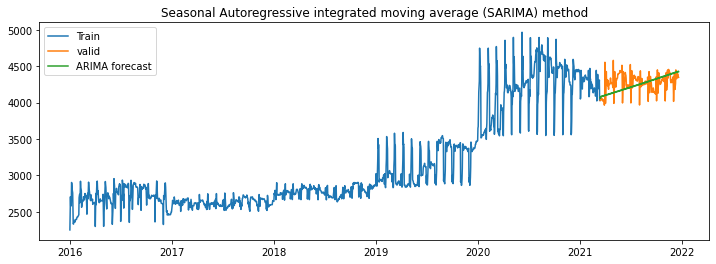

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='valid')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal Autoregressive integrated moving average (SARIMA) method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,266.50,5.63
0,Simple average method,1138.24,26.46
0,Simple Moveing Avg Method,137.87,2.72
0,Holt's exponential smoothing method,137.87,11.20
0,Holt's Wint additive and seasonality Method,2193.73,46.84
0,Holt's Wint Multi Method,411.13,7.86
0,Autoregressive (AR) method,183.32,3.43
0,Moving Average (MA) method,203.82,3.92
0,Autoregressive moving average (ARMA) method,897.03,20.78
0,Autoregressive integrated moving average (ARIM...,171.59,3.15


In [ ]:
start_date = 2021-12-22
end_date = 2022-1-21

In [ ]:
forecast = model_fit.predict(start = start_date, end = end_date)
forecast

2021-06-10    8.339338
2021-06-11    8.340349
2021-06-12    8.338727
2021-06-13    8.340105
2021-06-14    8.340510
2021-06-15    8.341520
2021-06-16    8.339898
2021-06-17    8.341277
2021-06-18    8.341681
2021-06-19    8.342692
2021-06-20    8.341069
2021-06-21    8.342448
2021-06-22    8.342853
2021-06-23    8.343863
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
forecast_df = pd.DataFrame(forecast)
forecast_df

,predicted_mean
2021-06-10,8.339338
2021-06-11,8.340349
2021-06-12,8.338727
2021-06-13,8.340105
2021-06-14,8.340510
2021-06-15,8.341520
2021-06-16,8.339898
2021-06-17,8.341277
2021-06-18,8.341681
2021-06-19,8.342692


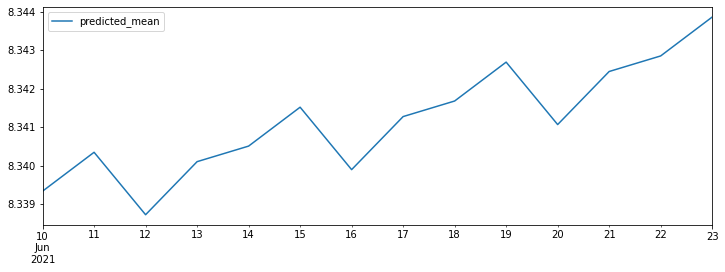

In [ ]:
forecast_df.plot(figsize=(12,4))
plt.show()

In [ ]:
plt.plot(train['price'],label='train')
plt.plot(test['ptive'])